# Read the data from csv file, then process

In [1]:
import numpy
import csv
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

#open the csv document.
data=open("winequality-red.csv")


#read the first row of data which are attributes into list names, then read the rest data into list row, 
#meanwhile, extract the last column of list row, then, put it in the list labels.
xlist = []
labels = []
names = []
firstline = True
for line in data:
    if firstline:
        names = line.strip().split(';')
        firstline = False
    else:
        row = line.strip().split(';')
        labels.append(float(row[-1]))
        row.pop()
        floatrow = [float(num) for num in row]
        xlist.append(floatrow)

#compute size of rows and columns.
nrows = len(xlist)
ncols = len(xlist[1])

#transfer into numpy format.
x = numpy.array(xlist)
y = numpy.array(labels)
winenames = numpy.array(names)


C:\Users\pro\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Train the model and output the prediction accuracy

The maximum acurracy is: 100==>0.7104166666666667
The maximum acurracy is: 150==>0.7104166666666667
The maximum acurracy is: 180==>0.7104166666666667
The maximum acurracy is: 280==>0.7104166666666667
MSE: 0.38125


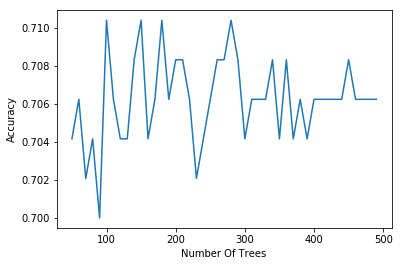

In [2]:
#randomly draw 30% data from the dataset for testing, and set the random_state equals 531.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=531)

mseoos = []
accuracy = []
#test the accruacy in terms of amounts of trees which range from 50 to 500, and the single step is 10.
ntreelist = range(50,500,10)
dic = {}
for itrees in ntreelist:
    count = 0
    depth = None
    maxfeat = 4
    #train the Random Forest model.
    winerandomforestmodel = ensemble.RandomForestClassifier(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain,ytrain)
    prediction = winerandomforestmodel.predict(xtest)
    #put the prediction accuracy into dictionary.
    for i in range(len(prediction)):
        if prediction[i] == ytest[i]:
            count += 1
    accuracy.append((count/len(prediction)))
    dic[itrees] = count/len(prediction)
    mseoos.append(mean_squared_error(ytest,prediction))
for key,value in dic.items():
    if value == max(dic.values()):
        print('The maximum acurracy is: '+ str(key) +'==>'+str(value))
print("MSE: " + str(mseoos[-1]))
plot.plot(ntreelist,accuracy)
plot.xlabel("Number Of Trees")
plot.ylabel("Accuracy")
plot.show()


# Output the importance of each feature

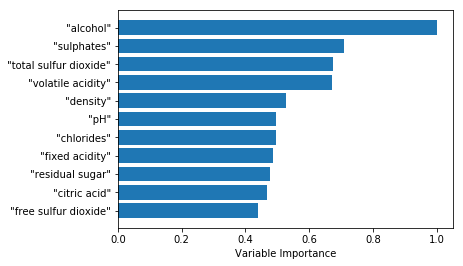

In [3]:
#using the feature_importances_ method to extract the numpy of attributes importance.
featureimportance = winerandomforestmodel.feature_importances_
#regularization
featureimportance = featureimportance/featureimportance.max()
#method argsort return the index of array.
sorted_idx = numpy.argsort(featureimportance)
barpos = numpy.arange(sorted_idx.shape[0]) + .5

plot.barh(barpos,featureimportance[sorted_idx],align='center')
plot.yticks(barpos,winenames[sorted_idx])
plot.xlabel("Variable Importance")
plot.show()